In [27]:
import os
import sys
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.metrics import scores

ROOT_DIR = os.path.abspath("../../../")  # 指定根目录

# 导入Mask RCNN
sys.path.append(ROOT_DIR)  # 查找库的本地版本
from mrcnn.config import Config
from mrcnn import utils
from mrcnn import model as modellib
from mrcnn import visualize
from samples.hpv_models.code.hpv import train, detect, NucleusDataset, NucleusConfig, NucleusInferenceConfig

In [28]:
ROOT_DIR = os.path.abspath("../../../")
sys.path.append(ROOT_DIR)  # To find local version of the library
#from mrcnn import utils
from ap import compute_ap
from mrcnn import visualize
import mrcnn.model as modellib
import pickle

##############  配置参数  ####
LOGS_DIR = os.path.join(ROOT_DIR, "samples/hpv_models/logs")
DATASET_DIR = os.path.join(ROOT_DIR, "samples/hpv_models/data")   #  数据集
print(DATASET_DIR)
config = NucleusInferenceConfig()
DEVICE = "/gpu:0"
TEST_MODE = "inference"


#####  加载测试集数据  #####
dataset = NucleusDataset()
dataset.load_nucleus(DATASET_DIR, "stage1_test")
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

/home/hqyone/mnt/2tb/github/MaskRCNN_TF1/samples/hpv_models/data
Images: 8
Classes: ['BG', 'yin', 'yin-yang', 'yang']


In [29]:
# Two helper functions
def get_ax(rows=1, cols=1, size=16):
    fig, ax = plt.subplots(rows, cols, figsize=(size * cols, size * rows))
    fig.tight_layout()
    return ax
def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename, 'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存txt文件成功")

In [30]:
#####  导入模型  ####
# image_id = random.choice(dataset.image_ids)   # 随机选取一张测试集
image_ids = dataset.image_ids
print(image_ids)

with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",model_dir=LOGS_DIR,config=config)
# weights_path = "/Mask_RCNN/logs/hpv20210105T1517/mask_rcnn_hpv_0799.h5"
weights_path = "/home/hqyone/mnt/2tb/github/MaskRCNN_TF1/samples/hpv_models/logs/mask_rcnn_model3-3_0150.h5"
model.load_weights(weights_path, by_name=True)



[0 1 2 3 4 5 6 7]


In [31]:
# Old method is not good/correct
# APs = []
# count1 = 0
# for image_id in image_ids:
#     info = dataset.image_info[image_id]
#     print("image_id: ", image_id)
#     # ####重要步骤：获得测试图片的信息
#     image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
#     #print(image)
#     # ###保存实际结果
#     if count1 == 0:
#         # gt_image_id_all, gt_bbox_all, gt_class_id_all, gt_mask_all = [image_id]*len(gt_class_id), gt_bbox, gt_class_id, gt_mask
#         gt_bbox_all, gt_class_id_all, gt_mask_all = gt_bbox, gt_class_id, gt_mask
#     else:
#         # gt_image_id_all=np.concatenate((gt_class_id_all, [image_id]*len(gt_class_id)), axis=0)
#         gt_bbox_all = np.concatenate((gt_bbox_all, gt_bbox), axis=0)
#         gt_class_id_all = np.concatenate((gt_class_id_all, gt_class_id), axis=0)
#         gt_mask_all = np.concatenate((gt_mask_all, gt_mask), axis=2)
#     # # 显示检测结果
#     results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)
#     r = results[0]
#     # 保存预测结果
#     if count1 == 0:
#         # pre_image_id_all, pre_masks_all, pre_class_ids_all, pre_rois_all, pre_scores_all = [image_id]*len(r["class_ids"]),r['masks'], r["class_ids"], r["rois"], r["scores"]
#         pre_masks_all, pre_class_ids_all, pre_rois_all, pre_scores_all = r['masks'], r["class_ids"], r["rois"], r["scores"]
#     else:
#         # pre_image_id_all = np.concatenate((pre_class_ids_all, [image_id]*len(r["class_ids"])), axis=0)
#         pre_masks_all = np.concatenate((pre_masks_all, r['masks']), axis=2)
#         pre_class_ids_all = np.concatenate((pre_class_ids_all, r['class_ids']), axis=0)
#         pre_rois_all = np.concatenate((pre_rois_all, r['rois']), axis=0)
#         pre_scores_all = np.concatenate((pre_scores_all, r['scores']), axis=0)

#     count1 += 1
#     #break

# # ######绘制PR曲线######
# AP, precisions, recalls, overlaps = compute_ap(gt_bbox_all, gt_class_id_all, gt_mask_all,
#                                                     pre_rois_all, pre_class_ids_all, pre_scores_all, pre_masks_all)


In [32]:
# print(pre_image_id_all)
# print(gt_image_id_all)

In [33]:

# # 在阈值0.5到0.95之间每隔0.1显示AP值
# utils.compute_ap_range(gt_bbox_all, gt_class_id_all, gt_mask_all, pre_rois_all, pre_class_ids_all, pre_scores_all, pre_masks_all, verbose=1)
## 在图片中显示真实与预测之间的差异
# visualize.display_differences(image, gt_bbox, gt_class_id, gt_mask, r['rois'], r['class_ids'], r['scores'], r['masks'],
#                               dataset.class_names, ax=get_ax(), show_box=False, show_mask=False, iou_threshold=0.5, score_threshold=0.5)
# plt.show()

# print("precisions: ", precisions)
# print("AP: ", AP)

# plt.figure("P-R Curve")
# plt.title('Precision-Recall Curve. AP@50 = {:.3f}'.format(AP))
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.plot(recalls, precisions, 'b', label='PR')
# plt.show()
# text_save('Kpreci.txt', precisions)
# text_save('Krecall.txt', recalls)

In [35]:
#print(precisions)
def calculateMatch(image_id):
    info = dataset.image_info[image_id]
    print("image_id: ", image_id)
    # ####重要步骤：获得测试图片的信息
    image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    # # 显示检测结果
    results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)
    r = results[0]
    pre_masks, pre_class_ids, pre_rois, pre_scores = r['masks'], r["class_ids"], r["rois"], r["scores"]
    gt_match, pred_match, overlaps = utils.compute_matches(gt_bbox, gt_class_id, gt_mask,
                                                     pre_rois, pre_class_ids, pre_scores, pre_masks)
    return (gt_match, pred_match, overlaps, pre_scores)

count1=0
for image_id in image_ids:
    gt_match, pred_match, overlaps, pre_scores = calculateMatch(image_id)
    # 保存预测结果
    if count1 == 0:
        gt_match_all,pred_match_all,pre_scores_all = gt_match, pred_match, pre_scores
    else:
        gt_match_all = np.concatenate((gt_match_all, gt_match), axis=0)
        pred_match_all = np.concatenate((pred_match_all, pred_match), axis=0)
        pre_scores_all = np.concatenate((pre_scores_all, pre_scores), axis=0)
    count1+=1

# sort pred_match_all by pre_scores_all
pred_match_all = np.array([x for _, x in sorted(zip(list(pre_scores_all),list(pred_match_all)),reverse=True)])

# Compute precision and recall at each prediction box step
precisions = np.cumsum(pred_match_all > -1) / (np.arange(len(pred_match_all)) + 1)
recalls = np.cumsum(pred_match_all > -1).astype(np.float32) / len(gt_match_all)

# Pad with start and end values to simplify the math
precisions = np.concatenate([[1], precisions, [0]])
recalls = np.concatenate([[0], recalls, [1]])

# Ensure precision values decrease but don't increase. This way, the
# precision value at each recall threshold is the maximum it can be
# for all following recall thresholds, as specified by the VOC paper.
for i in range(len(precisions) - 2, -1, -1):
    precisions[i] = np.maximum(precisions[i], precisions[i + 1])

# Compute mean AP over recall range
indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
mAP = np.sum((recalls[indices] - recalls[indices - 1]) *
                 precisions[indices])

    


image_id:  0
/home/hqyone/mnt/2tb/github/MaskRCNN_TF1/samples/hpv_models/data/stage1_test/1456/masksxxxxxx
Processing 1 images
image                    shape: (2048, 2048, 3)       min:   19.00000  max:  255.00000  uint8
molded_images            shape: (1, 2048, 2048, 3)    min:   19.00000  max:  255.00000  uint8
image_metas              shape: (1, 16)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 1047552, 4)       min:   -0.04422  max:    1.01295  float32
image_id:  1
/home/hqyone/mnt/2tb/github/MaskRCNN_TF1/samples/hpv_models/data/stage1_test/1458/masksxxxxxx
Processing 1 images
image                    shape: (2048, 2048, 3)       min:   21.00000  max:  249.00000  uint8
molded_images            shape: (1, 2048, 2048, 3)    min:   21.00000  max:  249.00000  uint8
image_metas              shape: (1, 16)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 1047552, 4)       min:   -0.04422  max:    1.0

precisions:  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       

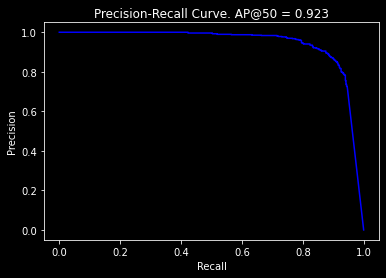

保存txt文件成功
保存txt文件成功


In [26]:
# Compute mean AP over recall range
indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
mAP = np.sum((recalls[indices] - recalls[indices - 1]) *
                 precisions[indices])


#print("precisions: ", precisions)
print("AP: ", mAP)

plt.figure("P-R Curve")
plt.title('Precision-Recall Curve. AP@50 = {:.3f}'.format(mAP))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recalls, precisions, 'b', label='PR')
plt.show()
text_save('Kpreci.txt', precisions)
text_save('Krecall.txt', recalls)  